# PROJECT DEFINITION

## Project Overview/Problem Statement
The project is to compare the performance of an autoencoder with one-class SVM model in detecting fraud in credit card transactions. The data has been anonymized due to privacy reason and it is publicly available here
https://www.kaggle.com/mlg-ulb/creditcardfraud


## Metrics
The metrics used to compare performance are **accuracy**, **recall** and **precision**. More emphasize will be given on recall in order to capture as many fraudulent cases as possible.

# DATA ANALYSIS AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

In [2]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [3]:
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
total_null = df.isnull().sum().sum()
print("Total null in the dataset is: {}".format(total_null))

Total null in the dataset is: 0


In [5]:
df.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

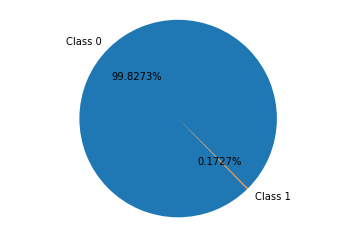

In [6]:
class_1 = df['Class'].mean()
class_0 = 1 - class_1

labels = 'Class 0', 'Class 1'
sizes = [class_0, class_1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=315)
ax1.axis('equal')

plt.show()

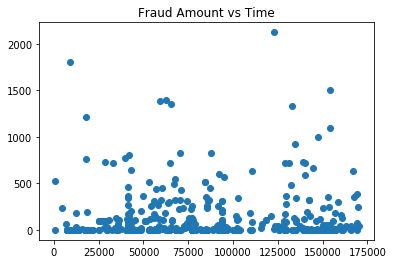

In [7]:
plt.scatter(df[df.Class==1]['Time'],df[df.Class==1]['Amount']);
plt.title("Fraud Amount vs Time");

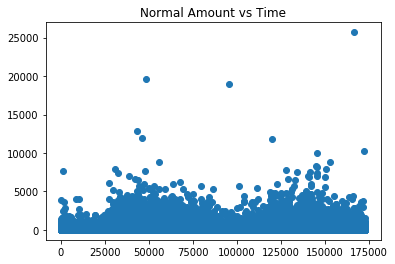

In [8]:
plt.scatter(df[df.Class==0]['Time'],df[df.Class==0]['Amount']);
plt.title("Normal Amount vs Time");

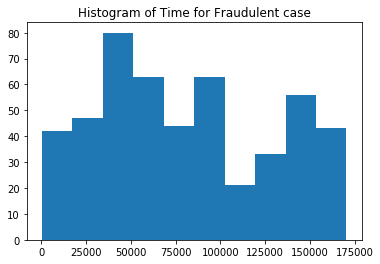

In [9]:
plt.hist(df[df.Class==1]['Time']);
plt.title('Histogram of Time for Fraudulent case');

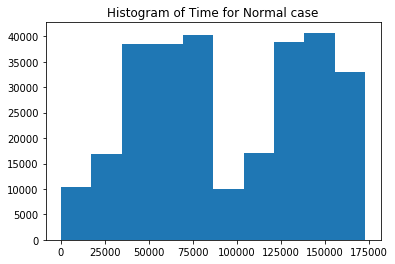

In [10]:
plt.hist(df[df.Class==0]['Time']);
plt.title('Histogram of Time for Normal case');

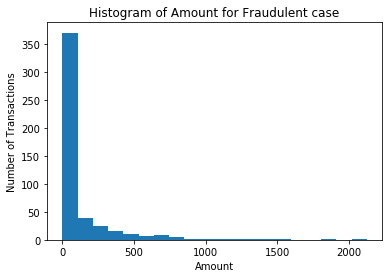

In [11]:
plt.hist(df[df.Class==1]['Amount'], bins=20);
plt.title('Histogram of Amount for Fraudulent case');
plt.xlabel('Amount');
plt.ylabel('Number of Transactions');

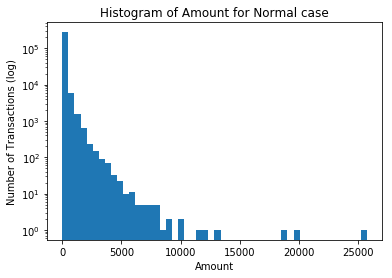

In [12]:
plt.hist(df[df.Class==0]['Amount'], bins=50);
plt.title('Histogram of Amount for Normal case');
plt.yscale('log')
plt.xlabel('Amount');
plt.ylabel('Number of Transactions (log)');

### Remarks:

- There are 31 columns in the dataframe with 28 PCA components, Time, Amount and Class.
- Based on the histograms above, the Amount does differ between fraudulent and normal transactions.
- Based on the scatter plots and histograms above, Time does not really matter in identifying Fraud. Time will not be included in the predictive modelling part.
- From the pie chart above, the dataset is highly inbalance with 492 frauds out of 284807 transactions.
- There is no nulls in the dataset, so further cleaning is not necessary.

# ONE-CLASS SVM

In [13]:
# Preparing data for modelling
def prep_data(df):
    '''
    INPUT:
    df - input DataFrame
    
    OUTPUT:
    X_train - training input
    X_test - testing input
    y_test - testing ouput
    '''
    
    # Dropping Time as it does not matter to fraud detection
    df = df.drop(['Time'], axis=1)

    X_train, X_test = train_test_split(df, test_size=0.2, random_state=66)
    X_train = X_train[X_train.Class == 0]
    y_train = X_train.Class
    X_train = X_train.drop(['Class'], axis=1)

    y_test = X_test.Class
    X_test = X_test.drop(['Class'], axis=1)

    X_train = X_train.values
    X_test = X_test.values
    
    return X_train, X_test, y_test

In [14]:
df = pd.read_csv('creditcard.csv')
X_train, X_test, y_test = prep_data(df)
len(X_train)

227448

In [15]:
# Training and testing the model
model = OneClassSVM(gamma='auto', nu=0.05)
model.fit(X_train[:50000]) #Not all train data is used because of long training time
y_pred = model.predict(X_test)
# y_pred = y_pred.apply(lambda x: 1 if x == -1 else 0)
for i in range(len(y_pred)):
    y_pred[i] = 1 if y_pred[i] == -1 else 0

In [16]:
def print_metrics(actual, prediction):
    '''
    INPUT:
    actual - expected output
    prediction - predictted output
    '''
    accuracy = accuracy_score(actual, prediction)
    recall = recall_score(actual, prediction)
    precision = precision_score(actual, prediction)
    f1 = f1_score(actual, prediction)
    print('The accuracy score of the model = {}'.format(accuracy))
    print('The recall score of the model = {}'.format(recall))
    print('The precision score of the model = {}'.format(precision))
    print('The f1 score of the model = {}'.format(f1))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, prediction))

In [17]:
print_metrics(y_test, y_pred)

The accuracy score of the model = 0.9024788455461535
The recall score of the model = 0.8631578947368421
The precision score of the model = 0.014580369843527738
The f1 score of the model = 0.028676342017835286

Confusion Matrix:
[[51325  5542]
 [   13    82]]


### Remarks:
- Not all train data is used to fit the one-class SVM model because it is taking a long time to complete.
- Bacause the dataset is highly unbalanced, the metric used to measure model performance is recall i.e., we would like to detect as many frauds as possible.
- Although recall is quite high (86%), the precision is very low i.e., we have wrongly identified 5542 normal transactions as fraudulent.

# AUTOENCODER

In [19]:
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint

In [20]:
# Preparing data for modelling
df = pd.read_csv('creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
X_train, X_test, y_test = prep_data(df)

In [22]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoder = Dense(32, activation="tanh")(input_layer)
encoder = Dense(16, activation="relu")(encoder)

decoder = Dense(16, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

filepath = "autoencoder_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)

In [73]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, 
                          validation_data=(X_test, X_test), callbacks=[checkpoint], verbose=1)
pd.DataFrame(history.history).to_csv('history.csv')

Train on 227448 samples, validate on 56962 samples
Epoch 1/100
227448/227448 [==============================] - 10s 43us/step - loss: 0.6874 - acc: 0.7463 - val_loss: 0.6906 - val_acc: 0.8290

Epoch 00001: val_acc improved from -inf to 0.82901, saving model to autoencoder_model.h5
Epoch 2/100
227448/227448 [==============================] - 9s 40us/step - loss: 0.6271 - acc: 0.8395 - val_loss: 0.6757 - val_acc: 0.8236

Epoch 00002: val_acc did not improve from 0.82901
Epoch 3/100
227448/227448 [==============================] - 8s 34us/step - loss: 0.6154 - acc: 0.8575 - val_loss: 0.6563 - val_acc: 0.8645

Epoch 00003: val_acc improved from 0.82901 to 0.86452, saving model to autoencoder_model.h5
Epoch 4/100
227448/227448 [==============================] - 8s 34us/step - loss: 0.5976 - acc: 0.8678 - val_loss: 0.6484 - val_acc: 0.8643

Epoch 00004: val_acc did not improve from 0.86452
Epoch 5/100
227448/227448 [==============================] - 8s 34us/step - loss: 0.5940 - acc: 0.8744 

227448/227448 [==============================] - 8s 33us/step - loss: 0.5835 - acc: 0.8901 - val_loss: 0.6374 - val_acc: 0.9079

Epoch 00042: val_acc improved from 0.90336 to 0.90789, saving model to autoencoder_model.h5
Epoch 43/100
227448/227448 [==============================] - 8s 35us/step - loss: 0.5839 - acc: 0.8899 - val_loss: 0.6373 - val_acc: 0.8865

Epoch 00043: val_acc did not improve from 0.90789
Epoch 44/100
227448/227448 [==============================] - 7s 32us/step - loss: 0.5841 - acc: 0.8898 - val_loss: 0.6417 - val_acc: 0.8841

Epoch 00044: val_acc did not improve from 0.90789
Epoch 45/100
227448/227448 [==============================] - 7s 32us/step - loss: 0.5834 - acc: 0.8903 - val_loss: 0.6398 - val_acc: 0.8704

Epoch 00045: val_acc did not improve from 0.90789
Epoch 46/100
227448/227448 [==============================] - 7s 32us/step - loss: 0.5841 - acc: 0.8891 - val_loss: 0.6358 - val_acc: 0.8979

Epoch 00046: val_acc did not improve from 0.90789
Epoch 47/10

In [21]:
log = pd.read_csv('history.csv')
log.head()

,Unnamed: 0,val_loss,val_acc,loss,acc
0,0,0.690594,0.829009,0.687373,0.746324
1,1,0.675709,0.823619,0.627121,0.839462
2,2,0.656350,0.864524,0.615360,0.857541
3,3,0.648383,0.864278,0.597629,0.867834
4,4,0.645498,0.883624,0.593983,0.874358


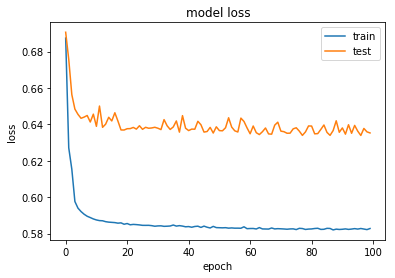

In [22]:
plt.plot(log['loss'])
plt.plot(log['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

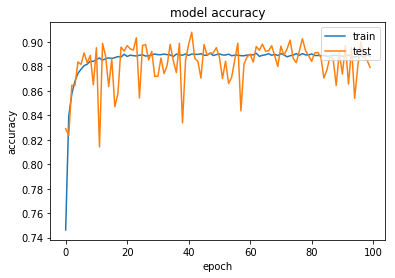

In [23]:
plt.plot(log['acc'])
plt.plot(log['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### Remarks:
- An autoencoder reconstructs input signal as its output. Hence, the reconstruction error of the two classes, normal and fraud is to be compared in order to determine suitable threshold to detect a fraud.

In [24]:
autoencoder = load_model('autoencoder_model.h5')
pred = autoencoder.predict(X_test)

In [25]:
mse = np.mean(np.power(X_test - pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_Error': mse, 'Class': y_test})
display(error_df)

,Reconstruction_Error,Class
223781,0.214220,0
10994,0.245218,0
241857,0.196075,0
190489,0.215130,0
149862,0.322802,0
202873,0.148754,0
149212,0.257533,0
17180,0.087304,0
26905,0.552559,0
19419,0.681798,0


In [26]:
error_df_fraud = error_df[error_df.Class == 1]['Reconstruction_Error']
error_df_normal = error_df[error_df.Class == 0]['Reconstruction_Error']

In [27]:
error_df_fraud.describe()

count     95.000000
mean      22.631737
std       32.747949
min        0.102286
25%        4.355744
50%        8.828182
75%       19.760773
max      162.589886
Name: Reconstruction_Error, dtype: float64

In [28]:
error_df_normal.describe()

count    56867.000000
mean         0.600648
std          3.224190
min          0.020290
25%          0.177886
50%          0.302129
75%          0.505382
max        328.448153
Name: Reconstruction_Error, dtype: float64

### Remarks:
- From the error distribution, the mean error for normal is strangely higher than fraud.
- The min, 25% and 50% error for normal is lower than fraud which is intuitively correct. 
- We have to select a threshold to make prediction i.e., whenever the error is bigger than the threshold, the transaction will be considered as a fraud.

In [29]:
threshold = 3
error_df['Prediction'] = error_df.Reconstruction_Error > threshold
error_df.Prediction = error_df.Prediction.apply(lambda x: 1 if x is True else 0)

In [30]:
print_metrics(error_df.Class, error_df.Prediction)

The accuracy score of the model = 0.9804255468557986
The recall score of the model = 0.8210526315789474
The precision score of the model = 0.0663265306122449
The f1 score of the model = 0.12273800157356413

Confusion Matrix:
[[55769  1098]
 [   17    78]]


### Remarks:
- Although the recall of the autoencoder is lower than that of one-class SVM, the other metrics are higher.
- Since the metrics of the autoencoder depend on the threshold of the reconstruction error, let's see some plots.

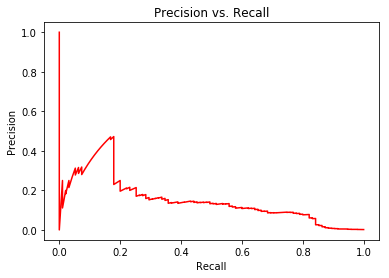

In [31]:
precision, recall, threshold_error = precision_recall_curve(error_df.Class, error_df.Reconstruction_Error)
plt.plot(recall, precision, 'r')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Remarks:
- Ideally we would like to have high precision and high recall.

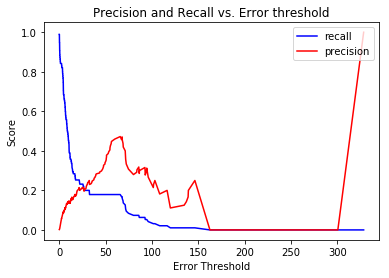

In [32]:
plt.plot(threshold_error, recall[1:], 'b')
plt.plot(threshold_error, precision[1:], 'r')
plt.title('Precision and Recall vs. Error threshold')
plt.xlabel('Error Threshold')
plt.ylabel('Score')
plt.legend(['recall', 'precision'], loc='upper right');
plt.show()

### Remarks:
- We can see from the plot above that precision and recall depend on the error threshold.
- As the threshold increases, the recall decreases and precision increases.
- At a very low threshold, although recall is high, precision is low.
- At a very high threshold, although precision is high, recall is low.

### Can we make prediction using z-score of the error instead of the threshold?

In [33]:
fraud_mean = error_df_fraud.mean()
fraud_std = error_df_fraud.std()
normal_mean = error_df_normal.mean()
normal_std = error_df_normal.std()

error_df['fraud_z_score'] = (error_df.Reconstruction_Error - fraud_mean)/fraud_std
error_df['normal_z_score'] = (error_df.Reconstruction_Error - normal_mean)/normal_std

# It is considered a fraud when its z-score is smaller then normal's z-score
error_df['Prediction_by_z_score'] = np.abs(error_df.fraud_z_score) < np.abs(error_df.normal_z_score)
error_df.Prediction_by_z_score = error_df.Prediction_by_z_score.apply(lambda x: 1 if x is True else 0)
error_df

,Reconstruction_Error,Class,Prediction,fraud_z_score,normal_z_score,Prediction_by_z_score
223781,0.214220,0,0,-0.684547,-0.119853,0
10994,0.245218,0,0,-0.683601,-0.110239,0
241857,0.196075,0,0,-0.685101,-0.125480,0
190489,0.215130,0,0,-0.684519,-0.119570,0
149862,0.322802,0,0,-0.681232,-0.086175,0
202873,0.148754,0,0,-0.686546,-0.140157,0
149212,0.257533,0,0,-0.683225,-0.106419,0
17180,0.087304,0,0,-0.688423,-0.159216,0
26905,0.552559,0,0,-0.674216,-0.014915,0
19419,0.681798,0,0,-0.670269,0.025169,0


In [34]:
print_metrics(error_df.Class, error_df.Prediction_by_z_score)

The accuracy score of the model = 0.9772304343246375
The recall score of the model = 0.8315789473684211
The precision score of the model = 0.05808823529411765
The f1 score of the model = 0.10859106529209621

Confusion Matrix:
[[55586  1281]
 [   16    79]]


### Remarks:
- The prediction scores obtained when using z-score are similar with the scores obtained using error threshold with threshold value equals 3.
- Using z-score is more systematic than manually selecting the threshold.

# RESULTS

In [45]:
results = {'Model': ['one-class SVM', 'autoencoder (threshold)', 'autoencoder (z-score)'], 
           'Accuracy': [90.2, 98.0, 97.7], 'Recall': [86.3, 82.1, 83.2], 'Precision': [1.5, 6.6, 5.8], 'F1-score': [2.9, 12.3, 10.9]}
results_df = pd.DataFrame(data=results)
results_df

,Model,Accuracy,Recall,Precision,F1-score
0,one-class SVM,90.2,86.3,1.5,2.9
1,autoencoder (threshold),98.0,82.1,6.6,12.3
2,autoencoder (z-score),97.7,83.2,5.8,10.9


# DISCUSSION
- From the table above, although autoencoders perform better than one-class SVM except for Recall score, their performance in general are similar.
- To make predictions, One-class SVM is more straightforward than antoencoder to use. This is because an autoencoder reconstructs the input as its ouput, hence decision has to be made how to use the reconstruction error to make predictions.
- Comparing the two antoencoder models, their performance is quite similar. It is interesting that the method using z-score of the reconstruction error has similar performance with manually selected threshold error method. This would eliminate the need for experimenting with the threshold values for making predictions.
- Note that not all data is used to train the one-class SVM model due to high computing power required whereas the entire training data was used to train the neural networks. It would be interesting to see if the performance of the one-class SVM would be different if we use all training data.

# CONCLUSION

## Reflection
We have explored credit card transactions data and use it to develop predictive model to detect fraudulent transactions. Two models have been investigated namely one-class SVM and antoencoder. The performance of the models have been compared and discussed. The relationship of Precision against Recall for the autoencoder and their dependencies on the reconstruction errors have been investigated.

The most interesting point from this project is that z-score of the reconstruction error can be used to make prediction for the autoencoder with similar performance compared with the method using a carefully and manually selected error threshold.

The most difficult part is getting both recall and precision scores high. I wonder if this is possible at all given the highly unbalanced dataset.

## Improvement
To improve the way to make predictions for the autoencoder, a method using z-score of the reconstruction errors has been implemented and discussed throughout the notebook.